In [1]:
import mesa
import seaborn as sns
import numpy as np
import pandas as pd
import random as rnd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class Agent(mesa.Agent):
    def __init__(self, id, model):
        super().__init__(id, model)
        self.base_dissatisfaction = 20
        self.close_friends_af = -10
        self.friends_af = -1
        self.network_af = 0
        self.personal_dissatisfaction = rnd.randint(0,self.base_dissatisfaction)
        self.affected_dissatisfaction = rnd.randint(0,self.base_dissatisfaction)
        self.dissatisfaction = rnd.randint(0, self.base_dissatisfaction)
        self.close_friends = np.array([])
        self.friends = np.array([])
        self.network = np.array([])
        self.id = id
        
    def add_close_friend(self,close_friend):
        self.close_friends = np.append(self.close_friends,close_friend)
        
    def add_friend(self,friend):
        self.friends = np.append(self.friends,friend)
        
    def add_to_network(self,network_friend):
        self.network = np.append(self.network,network_friend)

    def dissatisfaction_distance(self):
        weighted_average = (
            self.close_friends_af*(self.close_friends_dissatisfaction() - self.affected_dissatisfaction) + 
            self.friends_af*(self.friends_dissatisfaction() - self.affected_dissatisfaction) + 
            self.network_af*(self.network_dissatisfaction() - self.affected_dissatisfaction)
        ) / (self.close_friends_af + self.friends_af + self.network_af)
        return weighted_average

    def get_personal_dissatisfaction(self):
        return self.personal_dissatisfaction
        
    def get_affected_dissatisfaction(self):
        return self.affected_dissatisfaction

    def close_friends_dissatisfaction(self):
        average_friend_dis = 0
        for i in range(len(self.close_friends)):
            average_friend_dis += self.close_friends[i].get_affected_dissatisfaction()
        return average_friend_dis / len(self.close_friends)
         
    def friends_dissatisfaction(self):
        average_friend_dis = 0
        for i in range(len(self.friends)):
            average_friend_dis += self.friends[i].get_affected_dissatisfaction()
        return average_friend_dis / len(self.friends)
        
    def network_dissatisfaction(self):
        average_friend_dis = 0
        for i in range(len(self.network)):
            average_friend_dis += self.network[i].get_affected_dissatisfaction()
        return average_friend_dis / len(self.network)
        
    def update_dissatisfaction(self):
        affect_rate = 2
        # change =  self.dissatisfaction_distance() * math.exp((self.dissatisfaction_distance / 100)-1)
        change = self.dissatisfaction_distance()**3/100**2
        self.affected_dissatisfaction += change

        # # Just to see:  give a 1/1000 possibility that one agent becomes wild, maximum dissatisfaction
        if rnd.randint(0,100) <=5:
            if self.affected_dissatisfaction != self.base_dissatisfaction:
                self.affected_dissatisfaction += (self.base_dissatisfaction - self.affected_dissatisfaction)/10
        if rnd.randint(0,100) <= 3:
            if self.affected_dissatisfaction != 0:
                self.affected_dissatisfaction -= self.affected_dissatisfaction / 10

    def step(self):
        print('Dissatisfaction: ', self.dissatisfaction)
        self.update_dissatisfaction()

class Model(mesa.Model):
    def __init__(self, N):
        self.num_agents = N
        self.agents = []
        self.schedule = mesa.time.RandomActivation(self)
        for i in range(self.num_agents):
            a = Agent(i, self)
            self.agents.append(a)
            self.schedule.add(a)
            
        agent_groups = np.array(self.agents).reshape(-1, 4)
        for group in agent_groups:
            for agent in group:
                agent.add_close_friend(group)
        
        for agent in self.agents:
            agent.friends = self.add_to_agent(agent, 10, agent.friends)
            agent.network = self.add_to_agent(agent, 30, agent.network)

    def add_to_agent(self, agent, number_to_add, existing_items):
        while len(existing_items) != number_to_add:
            current_agent = self.agents[np.random.randint(0,99)]
            if not(np.any(agent.close_friends == current_agent)) and not(np.any(agent.friends == current_agent)) and not(np.any(agent.network == current_agent)):
                existing_items = np.append(existing_items, current_agent)
        return existing_items
                
    def step(self):
        self.schedule.step()

In [4]:
model = Model(100)
for i in range(10):
    model.step()

Dissatisfaction:  7
Dissatisfaction:  4
Dissatisfaction:  14
Dissatisfaction:  0
Dissatisfaction:  0
Dissatisfaction:  16
Dissatisfaction:  17
Dissatisfaction:  17
Dissatisfaction:  17
Dissatisfaction:  7
Dissatisfaction:  17
Dissatisfaction:  0
Dissatisfaction:  1
Dissatisfaction:  15
Dissatisfaction:  12
Dissatisfaction:  8
Dissatisfaction:  0
Dissatisfaction:  19
Dissatisfaction:  2
Dissatisfaction:  12
Dissatisfaction:  13
Dissatisfaction:  2
Dissatisfaction:  7
Dissatisfaction:  1
Dissatisfaction:  16
Dissatisfaction:  7
Dissatisfaction:  9
Dissatisfaction:  4
Dissatisfaction:  17
Dissatisfaction:  3
Dissatisfaction:  15
Dissatisfaction:  20
Dissatisfaction:  15
Dissatisfaction:  6
Dissatisfaction:  20
Dissatisfaction:  18
Dissatisfaction:  1
Dissatisfaction:  16
Dissatisfaction:  19
Dissatisfaction:  10
Dissatisfaction:  16
Dissatisfaction:  10
Dissatisfaction:  19
Dissatisfaction:  20
Dissatisfaction:  20
Dissatisfaction:  8
Dissatisfaction:  12
Dissatisfaction:  8
Dissatisfacti

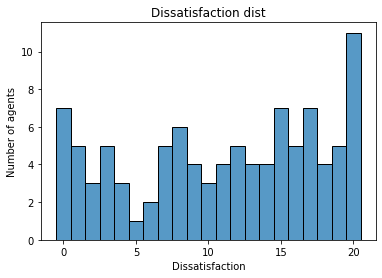

In [6]:
import matplotlib.pyplot as plt

agent_dis = [a.dissatisfaction for a in model.schedule.agents]
g = sns.histplot(agent_dis, discrete=True)
g.set(
    title="Dissatisfaction dist", xlabel="Dissatisfaction", ylabel="Number of agents"
);